In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns

In [19]:
df = pd.read_csv('medical-charges.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [23]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [24]:
fig = px.histogram(df, x= 'age', marginal='box', nbins=47, title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
fig = px.histogram(df, x= 'bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
fig = px.histogram(df, x= 'charges', marginal='box', color='smoker',color_discrete_sequence=['green', 'grey'], title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [28]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

In [29]:
fig = px.scatter(df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
df['sex'].mask(df['sex'] == 'female', 0, inplace=True)
print(df)
df['sex'].mask(df['sex'] == 'male', 1, inplace=True)
print(df)

      age   sex     bmi  children smoker     region      charges
0      19     0  27.900         0    yes  southwest  16884.92400
1      18  male  33.770         1     no  southeast   1725.55230
2      28  male  33.000         3     no  southeast   4449.46200
3      33  male  22.705         0     no  northwest  21984.47061
4      32  male  28.880         0     no  northwest   3866.85520
...   ...   ...     ...       ...    ...        ...          ...
1333   50  male  30.970         3     no  northwest  10600.54830
1334   18     0  31.920         0     no  northeast   2205.98080
1335   18     0  36.850         0     no  southeast   1629.83350
1336   21     0  25.800         0     no  southwest   2007.94500
1337   61     0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
      age sex     bmi  children smoker     region      charges
0      19   0  27.900         0    yes  southwest  16884.92400
1      18   1  33.770         1     no  southeast   1725.55230
2     

In [49]:
df['smoker'].mask(df['smoker'] == 'yes', 1, inplace=True)
print(df)
df['smoker'].mask(df['smoker'] == 'no', 0, inplace=True)
print(df)

      age sex     bmi  children smoker     region      charges
0      19   0  27.900         0      1  southwest  16884.92400
1      18   1  33.770         1     no  southeast   1725.55230
2      28   1  33.000         3     no  southeast   4449.46200
3      33   1  22.705         0     no  northwest  21984.47061
4      32   1  28.880         0     no  northwest   3866.85520
...   ...  ..     ...       ...    ...        ...          ...
1333   50   1  30.970         3     no  northwest  10600.54830
1334   18   0  31.920         0     no  northeast   2205.98080
1335   18   0  36.850         0     no  southeast   1629.83350
1336   21   0  25.800         0     no  southwest   2007.94500
1337   61   0  29.070         0      1  northwest  29141.36030

[1338 rows x 7 columns]
      age sex     bmi  children smoker     region      charges
0      19   0  27.900         0      1  southwest  16884.92400
1      18   1  33.770         1      0  southeast   1725.55230
2      28   1  33.000         

In [50]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [51]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [55]:
nSmoker = df[df.smoker=='0']

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

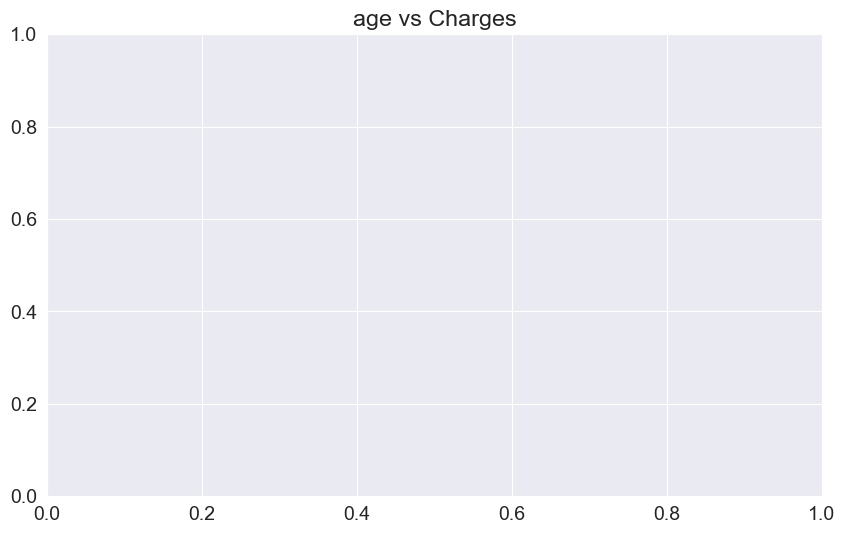

In [87]:
plt.title("age vs Charges")
plt.scatterplot(data=nSmoker, x = 'age', y='charges' , alpha=0.7, s=15)

In [57]:
# y = wx + b

In [80]:
def estimaate_charges(age, w, b):
    return w*age + b
w= 50
b = 100

In [81]:
estimaate_charges(30 , w, b)

1600

In [82]:
ages = nSmoker.age
ages

Series([], Name: age, dtype: int64)

In [83]:

estimaate_charges = estimaate_charges(ages, w, b)
estimaate_charges


Series([], Name: age, dtype: int64)

In [61]:
ages

Series([], Name: age, dtype: int64)

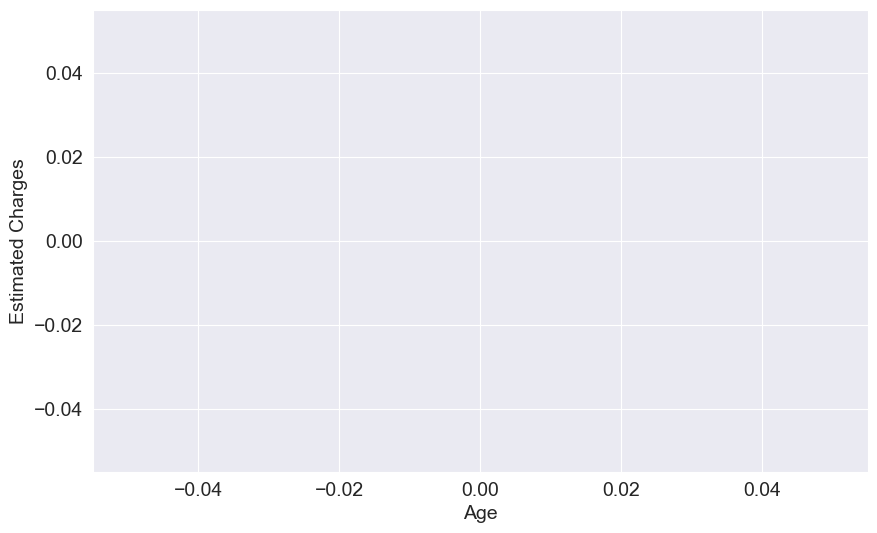

In [85]:
plt.plot(ages, estimaate_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.show()